In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
import seaborn as sns
import netCDF4
import matplotlib.patches as mpatches
%matplotlib inline

In [50]:
sns.set_style('white')
sns.set_context('paper', font_scale=3)
sns.set_palette('hls', 4)
sns.set_style('ticks')

In [3]:
fp25 = "/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf_rerun-1948-2007/gfdl.ncrc4-intel16-prod/pp/ocean_annual_rho2/av/annual_20yr/ocean_annual_rho2.1988-2007.ann.nc"
fp5  = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle200_rerun-1948-2007/gfdl.ncrc4-intel16-prod/pp/ocean_annual_rho2/av/annual_20yr/ocean_annual_rho2.1988-2007.ann.nc"
fp5n = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_p25config_rerun-1948-2007/gfdl.ncrc4-intel16-prod/pp/ocean_annual_rho2/av/annual_20yr/ocean_annual_rho2.1988-2007.ann.nc"
fp5nn = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle500_rerun-1948-2007/gfdl.ncrc4-intel16-prod/pp/ocean_annual_rho2/av/annual_20yr/ocean_annual_rho2.1988-2007.ann.nc"

In [4]:
dsp25  = netCDF4.Dataset(fp25)
dsp5   = netCDF4.Dataset(fp5)
dsp5n  = netCDF4.Dataset(fp5n)
dsp5nn = netCDF4.Dataset(fp5nn)

rho0 = 1035.0 

for v in dsp25.variables: print("p25 variable:", v)

p25 variable: xh
p25 variable: yh
p25 variable: rho2_l
p25 variable: rho2_i
p25 variable: time
p25 variable: nv
p25 variable: xq
p25 variable: yq
p25 variable: volcello
p25 variable: thkcello
p25 variable: umo
p25 variable: uhml
p25 variable: vmo
p25 variable: vhml
p25 variable: vo
p25 variable: time_bnds
p25 variable: average_T1
p25 variable: average_T2
p25 variable: average_DT


In [5]:
# transport mapped to rho2 

vmo_p25  = np.squeeze(dsp25.variables['vmo'],axis=0)
vmo_p5   = np.squeeze(dsp5.variables['vmo'],axis=0)
vmo_p5n  = np.squeeze(dsp5n.variables['vmo'],axis=0)
vmo_p5nn = np.squeeze(dsp5nn.variables['vmo'],axis=0)
print(vmo_p25.shape,np.ma.is_masked(vmo_p25))

# need to mask vmo arrays 
#vmo_p25 = np.ma.masked_greater(np.absolute(vmo_p25),1e12)
#vmo_p5  = np.ma.masked_greater(np.absolute(vmo_p5),1e12)
#vmo_p5n = np.ma.masked_greater(np.absolute(vmo_p5n),1e12)
#vmo_p5nn = np.ma.masked_greater(np.absolute(vmo_p5nn),1e12)

vmo_p25  = np.ma.masked_greater(vmo_p25,1e14)
vmo_p5   = np.ma.masked_greater(vmo_p5,1e14)
vmo_p5n  = np.ma.masked_greater(vmo_p5n,1e14)
vmo_p5nn = np.ma.masked_greater(vmo_p5nn,1e14)

(64, 1080, 1440) False


In [6]:
# velocity mapped to rho2 

vo_p25  = np.squeeze(dsp25.variables['vo'],axis=0)
vo_p5   = np.squeeze(dsp5.variables['vo'],axis=0)
vo_p5n  = np.squeeze(dsp5n.variables['vo'],axis=0)
vo_p5nn = np.squeeze(dsp5nn.variables['vo'],axis=0)

# need to mask vo arrays 
vo_p25  = np.ma.masked_greater(vo_p25,1e10)
vo_p5   = np.ma.masked_greater(vo_p5,1e10)
vo_p5n  = np.ma.masked_greater(vo_p5n,1e10)
vo_p5nn = np.ma.masked_greater(vo_p5nn,1e10)

print(vo_p25.shape,np.ma.is_masked(vo_p25))

(64, 1080, 1440) True


In [7]:
# thickness mapped to rho2 

thk_p25  = np.squeeze(dsp25.variables['thkcello'],axis=0)
thk_p5   = np.squeeze(dsp5.variables['thkcello'],axis=0)
thk_p5n  = np.squeeze(dsp5n.variables['thkcello'],axis=0)
thk_p5nn = np.squeeze(dsp5nn.variables['thkcello'],axis=0)

# need to mask thk arrays 
thk_p25  = np.ma.masked_greater(thk_p25,1e10)
thk_p5   = np.ma.masked_greater(thk_p5,1e10)
thk_p5n  = np.ma.masked_greater(thk_p5n,1e10)
thk_p5nn = np.ma.masked_greater(thk_p5nn,1e10)

print(thk_p25.shape,np.ma.is_masked(thk_p25))


#cumulative sum of thickness to get the time averaged depth of an isopycnal 
#since zrho will be used as an axis, we do not want to mask it

zrho_p25  = thk_p25.mean(axis=2).cumsum(axis=0)
zrho_p5   = thk_p5.mean(axis=2).cumsum(axis=0)
zrho_p5n  = thk_p5n.mean(axis=2).cumsum(axis=0)
zrho_p5nn = thk_p5nn.mean(axis=2).cumsum(axis=0)

zrho_p25.mask  = False
zrho_p5.mask   = False
zrho_p5n.mask  = False
zrho_p5nn.mask = False

print(zrho_p5.shape,np.ma.is_masked(zrho_p5),zrho_p5)

(64, 1080, 1440) True
(64, 576) False [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 537.8776414529419 518.2575639341935 ... 1827.7700447659522
  1836.2900856413282 1812.0038309636418]
 [0.0 537.8776414529419 518.2575639341935 ... 1827.777333323789
  1836.2948187716372 1812.0104588656814]
 [0.0 537.8776414529419 518.2575639341935 ... 1827.7863551410358
  1836.2979794461448 1812.0145240235975]]


In [8]:
ds_p25  = netCDF4.Dataset('/net/smg/OWG/analysis/OM4_analysis/OM4p25_IAF_BLING_CFC_csf/sigma2000/sigma2000.nc')
ds_p5   = netCDF4.Dataset('/net/smg/OWG/analysis/OM4_analysis/OM4p5_IAF_BLING_CFC_abio_csf_mle200/sigma2000/sigma2000.nc')
ds_p5n  = netCDF4.Dataset('/net/smg/OWG/analysis/OM4_analysis/OM4p5_IAF_BLING_CFC_abio_csf_p25config/sigma2000/sigma2000.nc')
ds_p5nn = netCDF4.Dataset('/net/smg/OWG/analysis/OM4_analysis/OM4p5_IAF_BLING_CFC_abio_csf_mle500/sigma2000/sigma2000.nc')

for v in ds_p5.variables: print("variables = ", v)
    
sigma_p25full = np.squeeze(ds_p25.variables['SIGMA2000_1988_2007'],axis=0)
sigma_p25full = np.ma.masked_greater(np.absolute(sigma_p25full),1e10)
sigma_p25 = np.mean(sigma_p25full,axis=2)
zl_p25    = ds_p25.variables['Z_L']
print(sigma_p25.shape,zl_p25)

sigma_p5full = np.squeeze(ds_p5.variables['SIGMA2000_1988_2007'],axis=0)
sigma_p5full = np.ma.masked_greater(np.absolute(sigma_p5full),1e10)
sigma_p5 = np.mean(sigma_p5full,axis=2)
zl_p5    = ds_p5.variables['Z_L']
print(sigma_p5.shape)

sigma_p5nfull = np.squeeze(ds_p5n.variables['SIGMA2000_1988_2007'],axis=0)
sigma_p5nfull = np.ma.masked_greater(np.absolute(sigma_p5nfull),1e10)
sigma_p5n = np.mean(sigma_p5nfull,axis=2)
zl_p5n    = ds_p5n.variables['Z_L']
print(sigma_p5n.shape)

sigma_p5nnfull = np.squeeze(ds_p5nn.variables['SIGMA2000_1988_2007'],axis=0)
sigma_p5nnfull = np.ma.masked_greater(np.absolute(sigma_p5nnfull),1e10)
sigma_p5nn = np.mean(sigma_p5nnfull,axis=2)
zl_p5nn    = ds_p5nn.variables['Z_L']
print(sigma_p5nn.shape)

variables =  XH
variables =  YH
variables =  YH_bnds
variables =  Z_L
variables =  Z_L_bnds
variables =  TIME
variables =  SIGMA2000_1948_1967
variables =  TIME1
variables =  SIGMA2000_1968_1987
variables =  TIME2
variables =  SIGMA2000_1988_2007
(35, 1080) <class 'netCDF4._netCDF4.Variable'>
float64 Z_L(Z_L)
    long_name: Depth at cell center
    units: meters
    positive: down
    point_spacing: uneven
    axis: Z
    standard_name: depth
    bounds: Z_L_bnds
unlimited dimensions: 
current shape = (35,)
filling on, default _FillValue of 9.969209968386869e+36 used

(35, 576)
(35, 576)
(35, 576)


In [9]:
# static fields 

sname_p25 = "/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf_rerun-1948-2007/gfdl.ncrc4-intel16-prod/pp/ocean_annual_rho2/ocean_annual_rho2.static.nc"
sname_p5  = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle200_rerun-1948-2007/gfdl.ncrc4-intel16-prod/pp/ocean_annual_rho2/ocean_annual_rho2.static.nc"

static_p25 = netCDF4.Dataset(sname_p25)
static_p5  = netCDF4.Dataset(sname_p5)

for v in static_p25.variables: print("static_p25 variable:", v)

dx_p25 = static_p25.variables['dxCu']
dx_p5  = static_p5.variables['dxCu']

area_p25 = static_p25.variables['areacello']
area_p5  = static_p5.variables['areacello']

rho_p25 = dsp25.variables['rho2_l']
y_p25 = static_p25.variables['yh']
x_p25 = static_p25.variables['xq']

rho_p5 = dsp5.variables['rho2_l']
x_p5 = static_p5.variables['xq']
y_p5 = static_p5.variables['yh']

print(dx_p25.shape,area_p25.shape,np.ma.is_masked(y_p25),rho_p25,np.ma.is_masked(rho_p25))

static_p25 variable: geolat
static_p25 variable: geolat_c
static_p25 variable: geolon
static_p25 variable: geolon_c
static_p25 variable: xh
static_p25 variable: xq
static_p25 variable: yh
static_p25 variable: yq
static_p25 variable: Coriolis
static_p25 variable: areacello
static_p25 variable: areacello_bu
static_p25 variable: areacello_cu
static_p25 variable: areacello_cv
static_p25 variable: deptho
static_p25 variable: dxCu
static_p25 variable: dxCv
static_p25 variable: dxt
static_p25 variable: dyCu
static_p25 variable: dyCv
static_p25 variable: dyt
static_p25 variable: geolat_u
static_p25 variable: geolat_v
static_p25 variable: geolon_u
static_p25 variable: geolon_v
static_p25 variable: hfgeou
static_p25 variable: sftof
static_p25 variable: wet
static_p25 variable: wet_c
static_p25 variable: wet_u
static_p25 variable: wet_v
(1080, 1440) (1080, 1440) False <class 'netCDF4._netCDF4.Variable'>
float64 rho2_l(rho2_l)
    long_name: Target Potential Density at cell center
    units: kg m-

In [10]:
# These are the horizontal grid (ocean_static) files for the OMIP runs
P25grid = netCDF4.Dataset('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static_masked_area.nc')
for v in P25grid.variables: print(v, end=' ')
print('')
print('')
P5grid = netCDF4.Dataset('/archive/gold/datasets/OM4_05/mosaic_ocean.v20180227.unpacked/ocean_static_masked_area.nc')
for v in P5grid.variables: print(v, end=' ')

xh yh time xq yq areacello deptho hfgeou sftof Coriolis geolon geolat geolon_c geolat_c geolon_u geolat_u geolon_v geolat_v wet wet_c wet_u wet_v dxt dyt dxCu dyCu dxCv dyCv areacello_cu areacello_cv areacello_bu basin 

xh yh time xq yq areacello deptho hfgeou sftof Coriolis geolon geolat geolon_c geolat_c geolon_u geolat_u geolon_v geolat_v wet wet_c wet_u wet_v dxt dyt dxCu dyCu dxCv dyCv areacello_cu areacello_cv areacello_bu basin 

(1080, 1440)


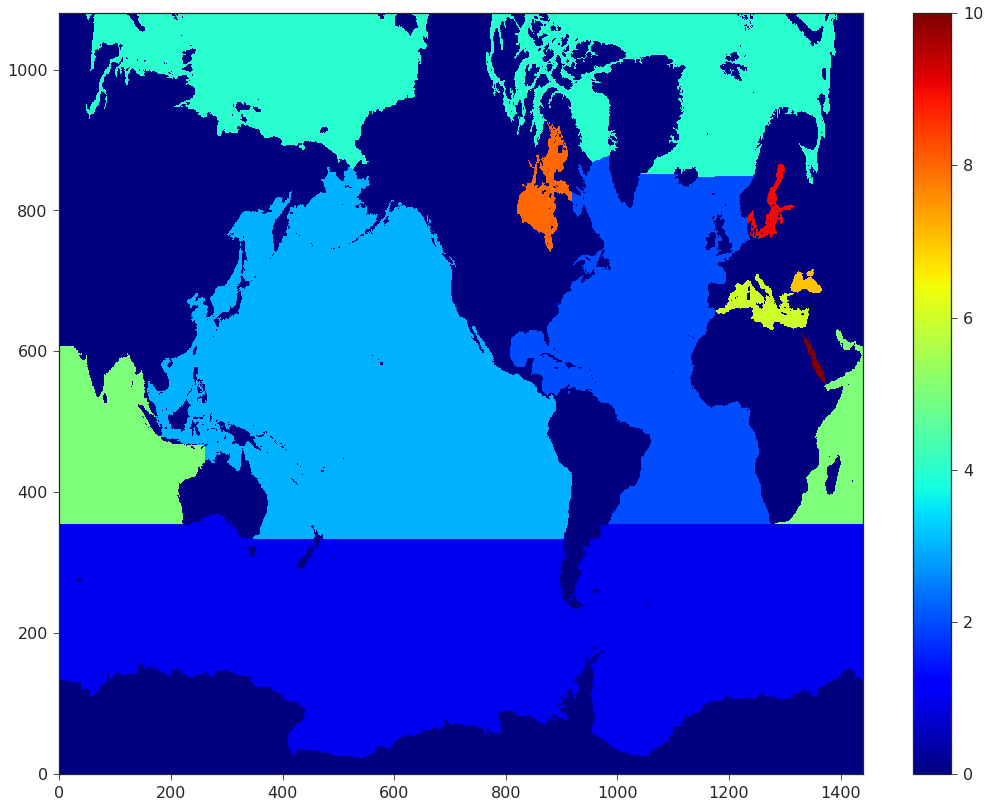

In [11]:
basin = P25grid.variables['basin'][:]
print(basin.shape)
plt.figure(figsize=(18,14))
plt.gca().set_facecolor('white')
plt.pcolormesh(basin,cmap='jet') 
plt.colorbar()

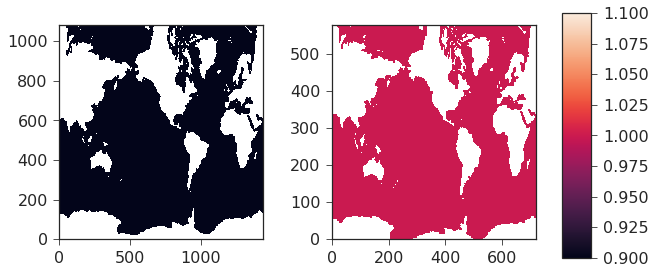

In [12]:
# define a mask for the region of interest; implemented only for z-overturning   

plt.figure(figsize=(8,4))

plt.subplot(121);
basin = P25grid.variables['basin'][:]
reg_mask = np.zeros(basin.shape)
reg_mask[(basin==1) | (basin==2) | (basin==3) | (basin==4) | (basin==5) | (basin==6) | (basin==7) | (basin==8) | (basin==9) | (basin==10)] = 1
#reg_mask[(basin==2) | (basin==4) | (basin==6) | (basin==7) | (basin==8) | (basin==9) ] = 1
reg_vmask = 1*reg_mask; reg_vmask[:-1,:] = reg_vmask[:-1,:] * reg_vmask[1:,:]
P25reg_vmask = np.ma.array( reg_vmask, mask=reg_vmask==0)
plt.pcolormesh(P25reg_vmask); #plt.colorbar();


plt.subplot(122);
basin = P5grid.variables['basin'][:]
reg_mask = np.zeros(basin.shape)
reg_mask[(basin==1) | (basin==2) | (basin==3) | (basin==4) | (basin==5) | (basin==6) | (basin==7) | (basin==8) | (basin==9) | (basin==10)] = 1
#reg_mask[(basin==2) | (basin==4) | (basin==6) | (basin==7) | (basin==8) | (basin==9) ] = 1
reg_vmask = 1*reg_mask; reg_vmask[:-1,:] = reg_vmask[:-1,:] * reg_vmask[1:,:]
P5reg_vmask = np.ma.array( reg_vmask, mask=reg_vmask==0)
im = plt.pcolormesh(P5reg_vmask); #plt.colorbar();

# Plot colorbar in it's own axes
plt.tight_layout()
cbar_ax = plt.gcf().add_axes([1.0, 0.1, 0.05, 0.85])
plt.gcf().colorbar(im, cax=cbar_ax);



In [13]:
fieldA = np.sum(vmo_p25,axis=2)
psi_p25 = (np.cumsum(fieldA,axis=0) - np.sum(fieldA,axis=0))/1e9 + 0.1  
#psi_p25 = (np.cumsum(fieldA,axis=0) )/1e9 + 0.1  

fieldB = np.sum(vmo_p5,axis=2)
psi_p5 = (np.cumsum(fieldB,axis=0) - np.sum(fieldB,axis=0))/1e9 + 0.1  
#psi_p5 = (np.cumsum(fieldB,axis=0) )/1e9 + 0.1  

fieldC = np.sum(vmo_p5n,axis=2)
psi_p5n = (np.cumsum(fieldC,axis=0) - np.sum(fieldC,axis=0))/1e9 + 0.1  

fieldD = np.sum(vmo_p5nn,axis=2)
psi_p5nn = (np.cumsum(fieldD,axis=0) - np.sum(fieldD,axis=0))/1e9 + 0.1  

levels_5_rho = np.arange(-30, 22.5, 5)

(1080,) (64,) (64, 1080)


<Figure size 720x360 with 0 Axes>

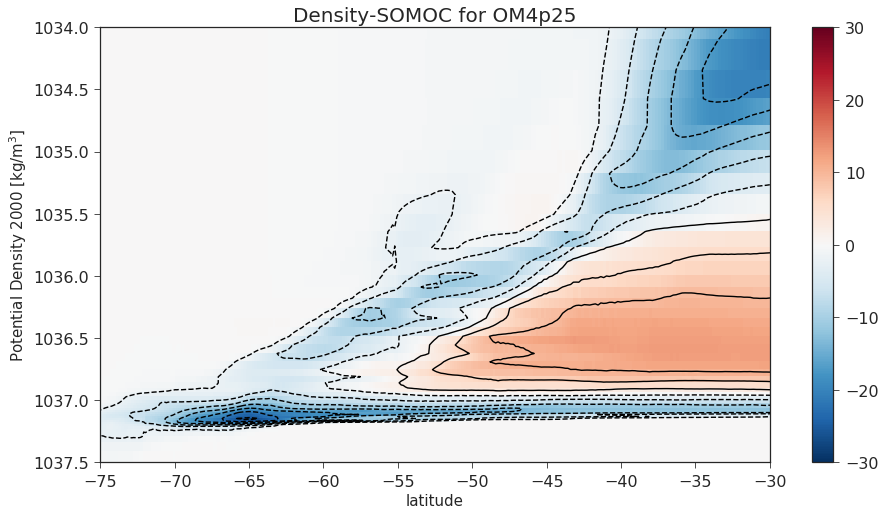

In [14]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p25
xcoord = y_p25
ycoord = rho_p25
print(xcoord.shape,ycoord.shape,field.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')

plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Density-SOMOC for OM4p25",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_OM4p25.png', bbox_inches='tight', dpi=300)

(64, 1080) (64, 1080) (64, 1080) (64, 1080)


<Figure size 720x360 with 0 Axes>

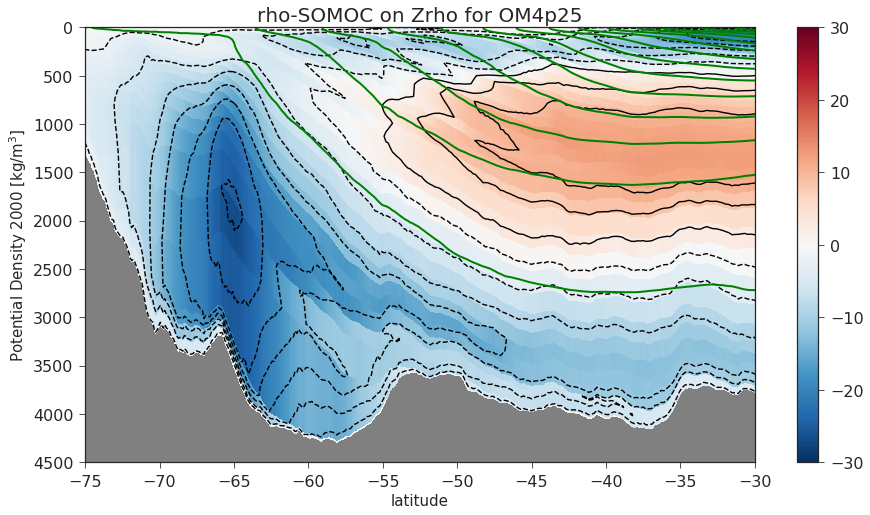

In [15]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p25

ycoord = zrho_p25
zarray = np.ones(ycoord.shape)
xcoord = y_p25 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=5,vmin=-30,vmax=30)
#plt.contourf(xcoord,ycoord,field,contours,cmap='RdBu_r')
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')


field = sigma_p25-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p25,zl_p25)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='g',vmin=33,vmax=40,linewidths=2)

#field = thk_p25
#plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=5,vmin=-20,vmax=20)


plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("rho-SOMOC on Zrho for OM4p25",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_zrho_OM4p25.png', bbox_inches='tight', dpi=300)

(64, 1080) (64, 1080) (64, 1080) (64, 1080)


<Figure size 720x360 with 0 Axes>

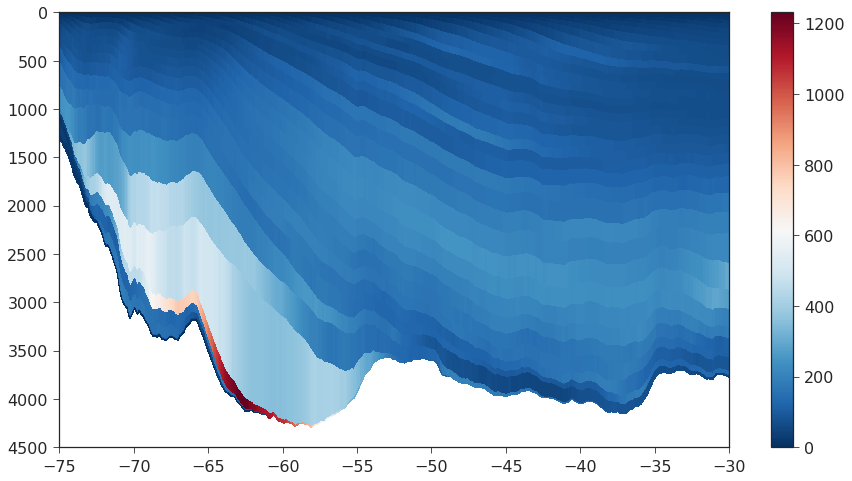

In [16]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = np.mean(thk_p25,axis=2)

ycoord = zrho_p25
zarray = np.ones(ycoord.shape)
xcoord = y_p25 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r')
#plt.contourf(xcoord,ycoord,field,contours,cmap='RdBu_r')
#plt.contour(xcoord,ycoord,field,colors='k',vmin=0,vmax=5000.0)
plt.colorbar()
plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()


(576,) (64,) (64, 576)


<Figure size 720x360 with 0 Axes>

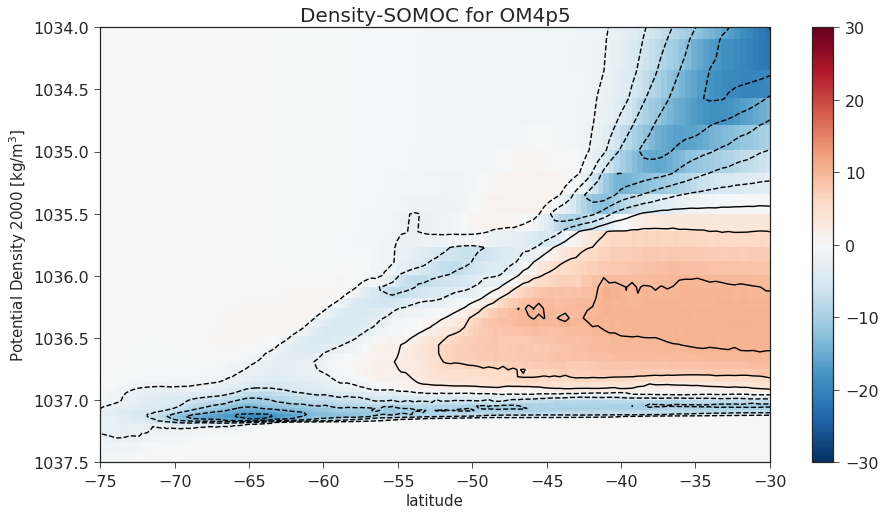

In [17]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p5
xcoord = y_p5
ycoord = rho_p5
print(xcoord.shape,ycoord.shape,field.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')

plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Density-SOMOC for OM4p5",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_OM4p5.png', bbox_inches='tight', dpi=300)

(64, 576) (64, 576) (64, 576) (64, 576)


<Figure size 720x360 with 0 Axes>

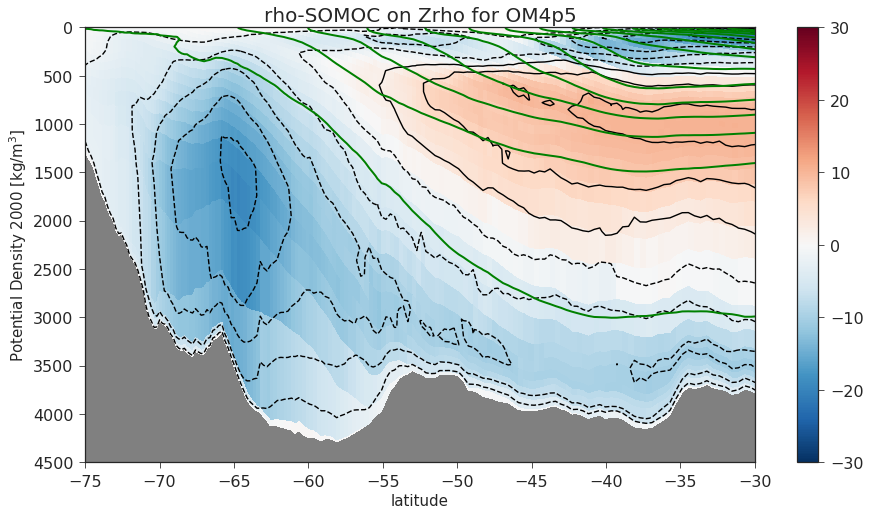

In [18]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p5

ycoord = zrho_p5
zarray = np.ones(ycoord.shape)
xcoord = y_p5 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')


field = sigma_p5-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,zl_p5)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='g',vmin=33,vmax=40,linewidths=2)


plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("rho-SOMOC on Zrho for OM4p5",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_zrho_OM4p5.png', bbox_inches='tight', dpi=300)

(576,) (64,) (64, 576)


<Figure size 720x360 with 0 Axes>

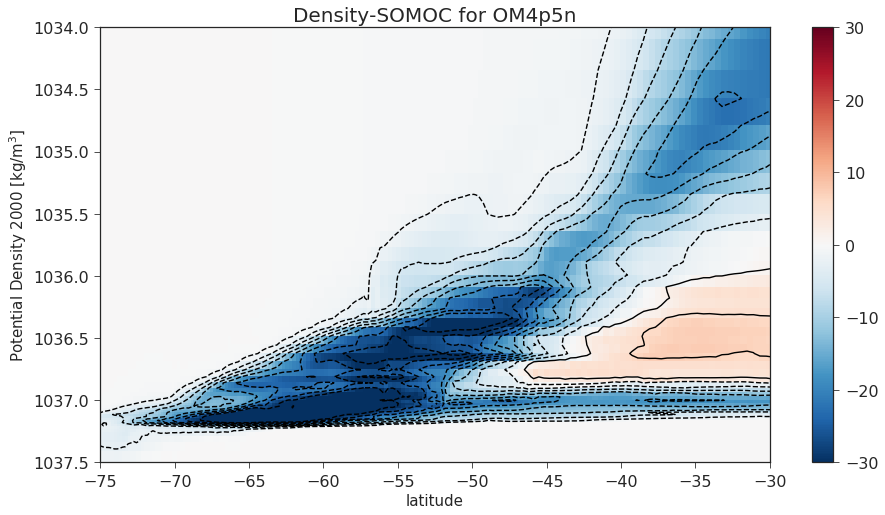

In [19]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p5n
xcoord = y_p5
ycoord = rho_p5
print(xcoord.shape,ycoord.shape,field.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')

plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Density-SOMOC for OM4p5n",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_OM4p5n.png', bbox_inches='tight', dpi=300)

(64, 576) (64, 576) (64, 576) (64, 576)


<Figure size 720x360 with 0 Axes>

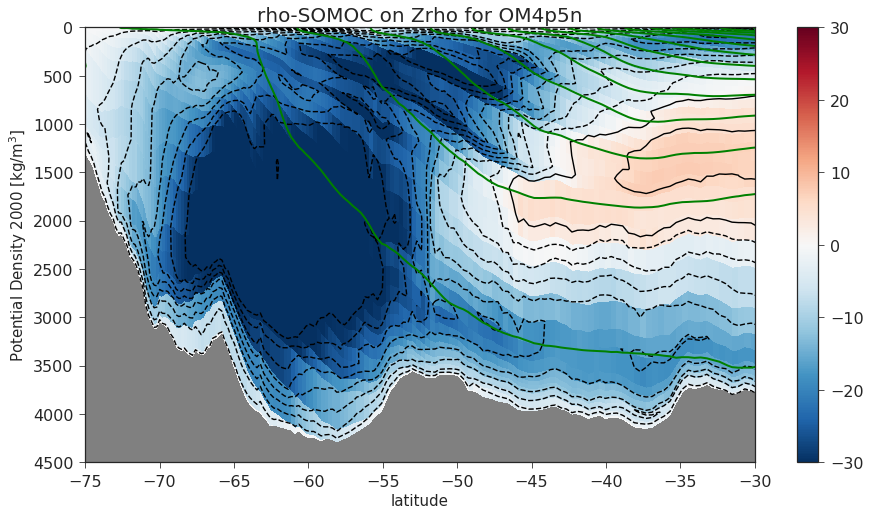

In [20]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p5n

ycoord = zrho_p5n
zarray = np.ones(ycoord.shape)
xcoord = y_p5 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')


field = sigma_p5n-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,zl_p5)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='g',vmin=33,vmax=40,linewidths=2)


plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("rho-SOMOC on Zrho for OM4p5n",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_zrho_OM4p5n.png', bbox_inches='tight', dpi=300)

(576,) (64,) (64, 576)


<Figure size 720x360 with 0 Axes>

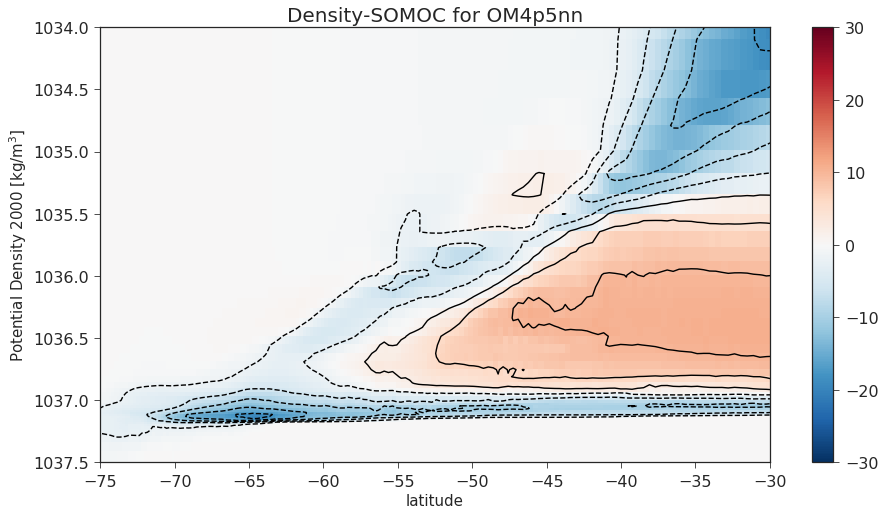

In [21]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p5nn
xcoord = y_p5
ycoord = rho_p5
print(xcoord.shape,ycoord.shape,field.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')

plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Density-SOMOC for OM4p5nn",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_OM4p5nn.png', bbox_inches='tight', dpi=300)

(64, 576) (64, 576) (64, 576) (64, 576)


<Figure size 720x360 with 0 Axes>

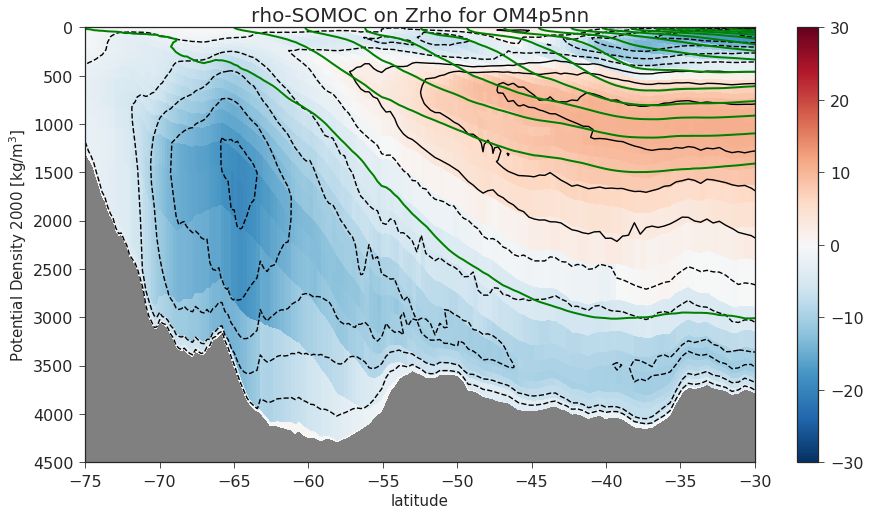

In [22]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p5nn

ycoord = zrho_p5nn
zarray = np.ones(ycoord.shape)
xcoord = y_p5 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')


field = sigma_p5nn-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,zl_p5)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='g',vmin=33,vmax=40,linewidths=2)


plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("rho-SOMOC on Zrho for OM4p5nn",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_density_zrho_OM4p5nn.png', bbox_inches='tight', dpi=300)

In [23]:
################# Now get the Eulerian overturning #############################################

In [24]:
# transport 

fp25 = "/archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"
fp5  = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_mle200/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"
fp5n = "/archive/oar.gfdl.bgrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p5_IAF_BLING_CFC_abio_csf_p25config/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z/av/annual_20yr/ocean_annual_z.1988-2007.ann.nc"

dsz_p25  = netCDF4.Dataset(fp25)
dsz_p5   = netCDF4.Dataset(fp5)
dsz_p5n  = netCDF4.Dataset(fp5n)

# aliases for Alistair's pasted code 
P25zdata = dsz_p25 
P5zdata  = dsz_p5
P5Nzdata = dsz_p5n
    
    

vmoz_p25  = np.squeeze(dsz_p25.variables['vmo'],axis=0)
vmoz_p5   = np.squeeze(dsz_p5.variables['vmo'],axis=0)
vmoz_p5n  = np.squeeze(dsz_p5n.variables['vmo'],axis=0)
print(vmoz_p25.shape,np.ma.is_masked(vmoz_p25))

vmoz_p25  = np.ma.masked_greater(vmoz_p25,1e14)
vmoz_p5   = np.ma.masked_greater(vmoz_p5,1e14)
vmoz_p5n  = np.ma.masked_greater(vmoz_p5n,1e14)

(35, 1080, 1440) False


In [25]:
# for z-overturning to get on proper vertical grid cells 
def meridional_transport(nc, mask=None):
    """Zonal sum of vmo from file nc"""
    vmo = nc.variables['vmo'][:]
    if mask is not None:
        vmo = vmo * mask # Mask
    return vmo.sum(axis=-1).mean(axis=0) # sum the i-direction, average the time axis
def psi_from_zavmo(zavmo, top_to_bottom=False):
    """Stream function corresponding to zonally integrated mass transport"""
    shp = zavmo.shape
    psi = numpy.zeros((shp[0]+1,shp[1]))
    if top_to_bottom:
        for k in range(shp[0]):
            psi[k] = psi[k-1] + zavmo[k-1]
    else:
        for k in range(shp[0],0,-1):
            psi[k-1] = psi[k] - zavmo[k-1]
    if type(zavmo) is numpy.ma.core.MaskedArray:
        psi = numpy.ma.array(psi) # Turn into masked array
        psi.mask = zavmo.mask[0,:] # Use broadcasting from 1d to 2d array
    return psi
def zi_for_zcoords(z_i, depth):
    """Returns 3d z* positions for interfaces in the z*-coordinate output using depth and nominal z_i"""
    nk = z_i.shape[0]-1 # Number of h layers
    shp = depth.shape
    zi = numpy.ma.zeros((nk+1,shp[0],shp[1]))
    zi[nk] = -numpy.abs(depth[:,:])
    for k in range(nk,0,-1):
        zi[k-1] = numpy.maximum( -numpy.abs(z_i[k-1]), zi[k] )
    return zi
def zi_at_v_for_zcoords(z_i, depth):
    """Returns 3d z* positions for interfaces at v-points in the z*-coordinate output using depth and nominal z_i"""
    nk = z_i.shape[0]-1 # Number of h layers
    shp = depth.shape
    depth_at_v = 1. * depth[:] ; depth_at_v[1:] = 0.5 * ( depth_at_v[1:] + depth_at_v[:-1] )
    zi = numpy.ma.zeros((nk+1,shp[0],shp[1]))
    zi[nk] = -numpy.abs(depth_at_v[:,:])
    for k in range(nk,0,-1):
        zi[k-1] = numpy.maximum( -numpy.abs(z_i[k-1]), zi[k] )
    return zi


In [26]:
fieldA = np.sum(vmoz_p25,axis=2)
psiz_p25 = (np.cumsum(fieldA,axis=0) - np.sum(fieldA,axis=0))/1e9 + 0.1  

fieldB = np.sum(vmoz_p5,axis=2)
psiz_p5 = (np.cumsum(fieldB,axis=0) - np.sum(fieldB,axis=0))/1e9 + 0.1  

fieldC = np.sum(vmoz_p5n,axis=2)
psiz_p5n = (np.cumsum(fieldC,axis=0) - np.sum(fieldC,axis=0))/1e9 + 0.1  

In [27]:
# get full cell thickness information.
# same for all three models  

# vertical position of center 
z_l = dsz_p25.variables['z_l']

# vertical position of interfaces
z_i = dsz_p5.variables['z_i']

# vertical cell thicknesses 
dz  = z_i[1:] - z_i[:-1]
#dzinv = 1.0/dz
dzinv = np.reciprocal(dz)

#print(dz.shape,', ',dz,', ',dzinv)
np.ma.is_masked(dz)

# cumulative sum 
dz_cumsum = np.cumsum(dz)
print(dz_cumsum.shape[0],', ', dz_cumsum)

35 ,  [5.0 15.0 25.0 40.0 62.5 87.5 112.5 137.5 175.0 225.0 275.0 350.0 450.0
 550.0 650.0 750.0 850.0 950.0 1050.0 1150.0 1250.0 1350.0 1450.0 1625.0
 1875.0 2250.0 2750.0 3250.0 3750.0 4250.0 4750.0 5250.0 5750.0 6250.0
 6750.0]


<Figure size 720x360 with 0 Axes>

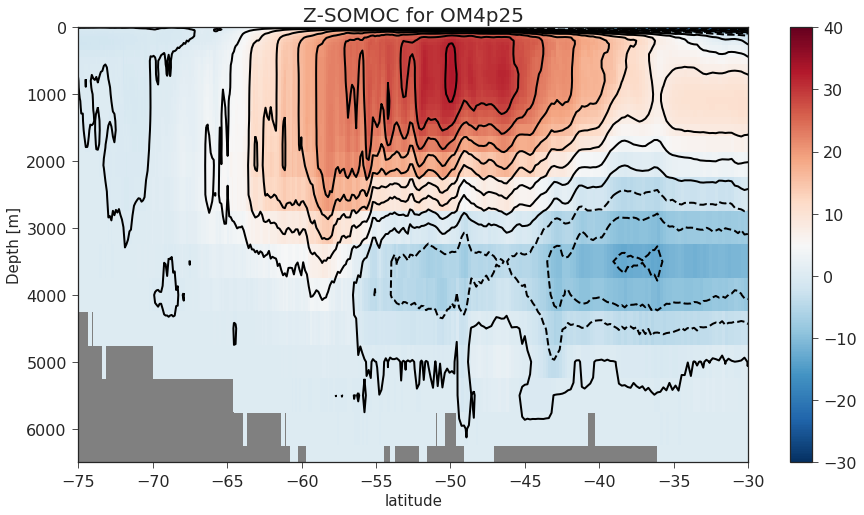

In [28]:
contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

# naive mapping with full cells 

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psiz_p25

xcoordmesh,ycoordmesh = np.meshgrid(y_p25,z_i)
plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
plt.colorbar()
xcoordmesh,ycoordmesh = np.meshgrid(y_p25,z_l)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='k',linewidths=2)

plt.xlim((-75,-30))
plt.ylim((0,6500))
plt.gca().invert_yaxis()

axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Z-SOMOC for OM4p25",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_z_OM4p25.png', bbox_inches='tight', dpi=300)

[]

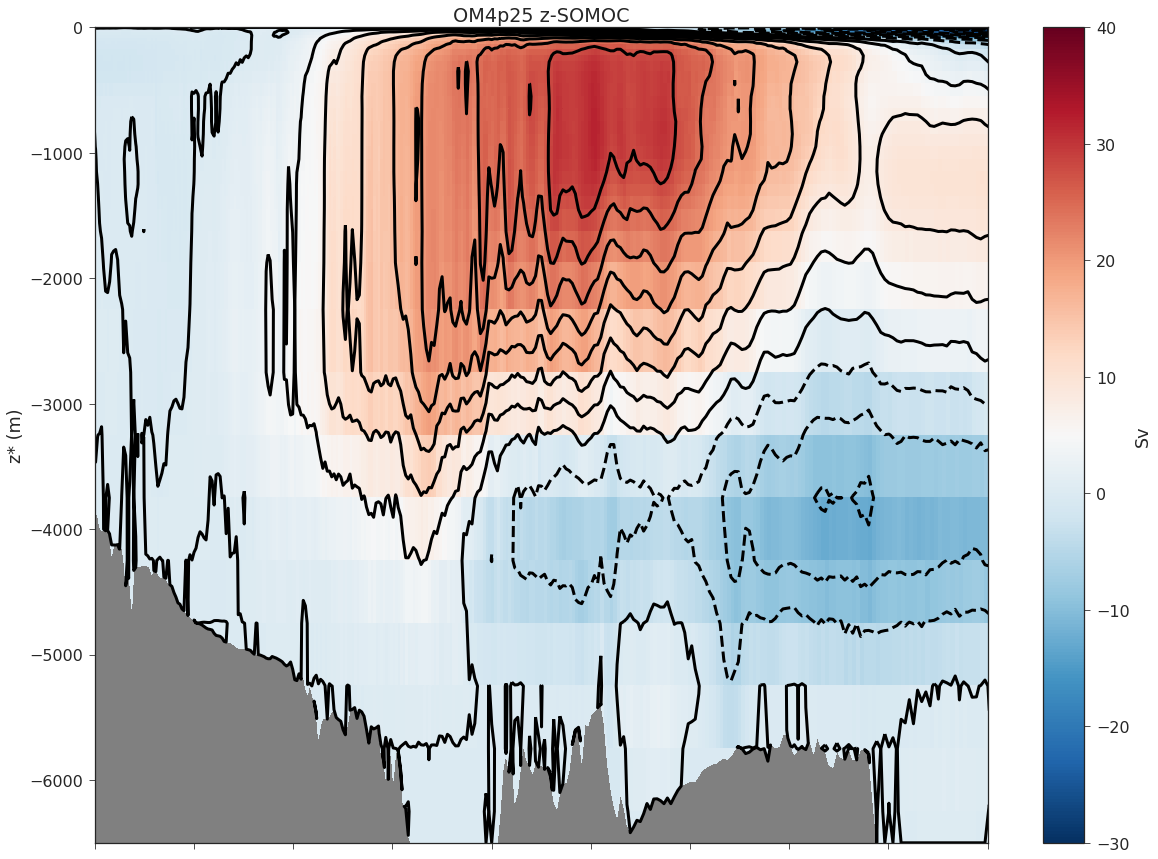

In [29]:
plt.figure(figsize=(20,15))
contour_levels = np.arange(-2,22,2)

#plt.subplot(311)
ni = P25grid.variables['geolat_c'].shape[1]
zi = zi_at_v_for_zcoords(P25zdata.variables['z_i'], P25grid.variables['deptho']).min(axis=-1).filled(0.)
y = P25grid.variables['geolat_c'][:,ni/4-1]
y = y + 0*zi;
psiz_p25 = psi_from_zavmo( meridional_transport(P25zdata, mask=P25reg_vmask), top_to_bottom=False )/1.035e9
plt.pcolormesh(y,zi,psiz_p25,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
cb = plt.colorbar();
cb.set_label('Sv')
plt.contour(y, zi, psiz_p25, 30, colors='k', linewidths=3);
plt.gca().set_facecolor('gray')

plt.xlim((-75,-30))
#plt.xlabel('Latitude $^\circ$N');
plt.ylabel('z* (m)');
plt.title('OM4p25 z-SOMOC')
plt.gca().set_xticklabels('')

<Figure size 720x360 with 0 Axes>

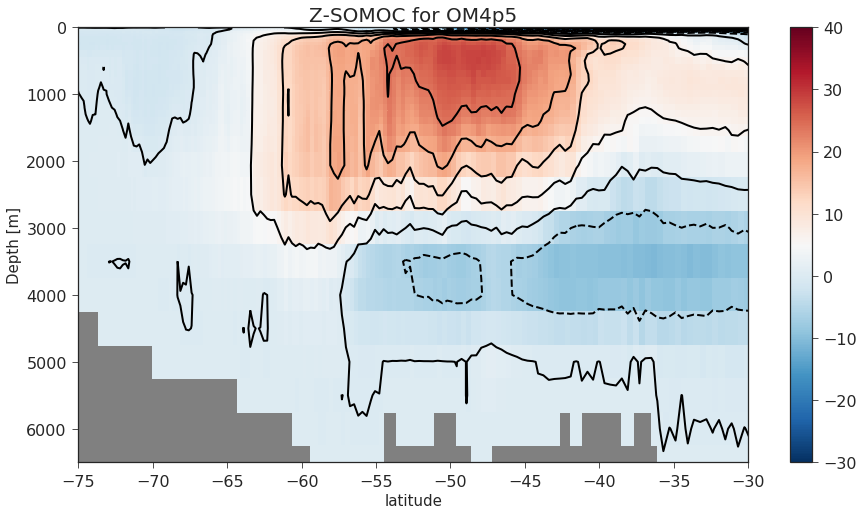

In [30]:
contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psiz_p5

xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_i)
plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
plt.colorbar()
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_l)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='k',linewidths=2)

plt.xlim((-75,-30))
plt.ylim((0,6500))
plt.gca().invert_yaxis()

axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Z-SOMOC for OM4p5",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_z_OM4p5.png', bbox_inches='tight', dpi=300)

<Figure size 720x360 with 0 Axes>

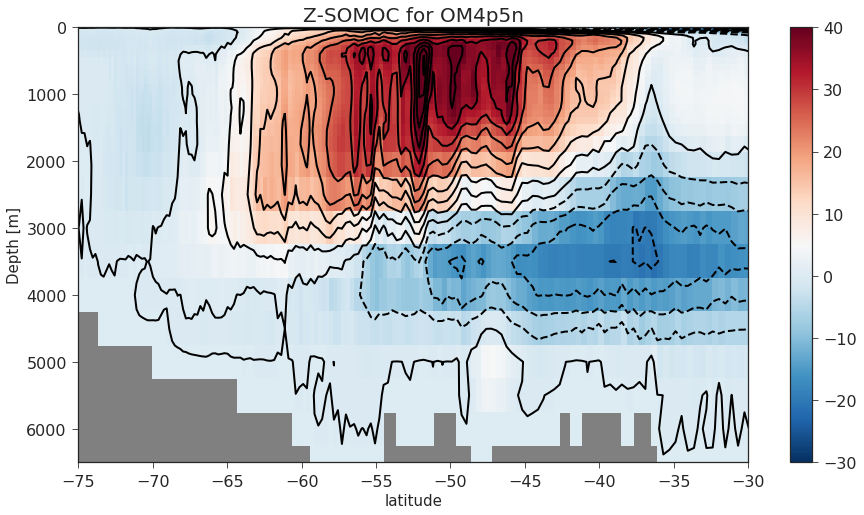

In [31]:
contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psiz_p5n

xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_i)
plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
plt.colorbar()
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_l)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='k',linewidths=2)

plt.xlim((-75,-30))
plt.ylim((0,6500))
plt.gca().invert_yaxis()

axis.set_ylabel("Depth [m]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Z-SOMOC for OM4p5n",fontsize=20)

plt.show()

fig.savefig('./figures/somoc_z_OM4p5n.png', bbox_inches='tight', dpi=300)

(64, 1080)   (1080,)   (64,)


[]

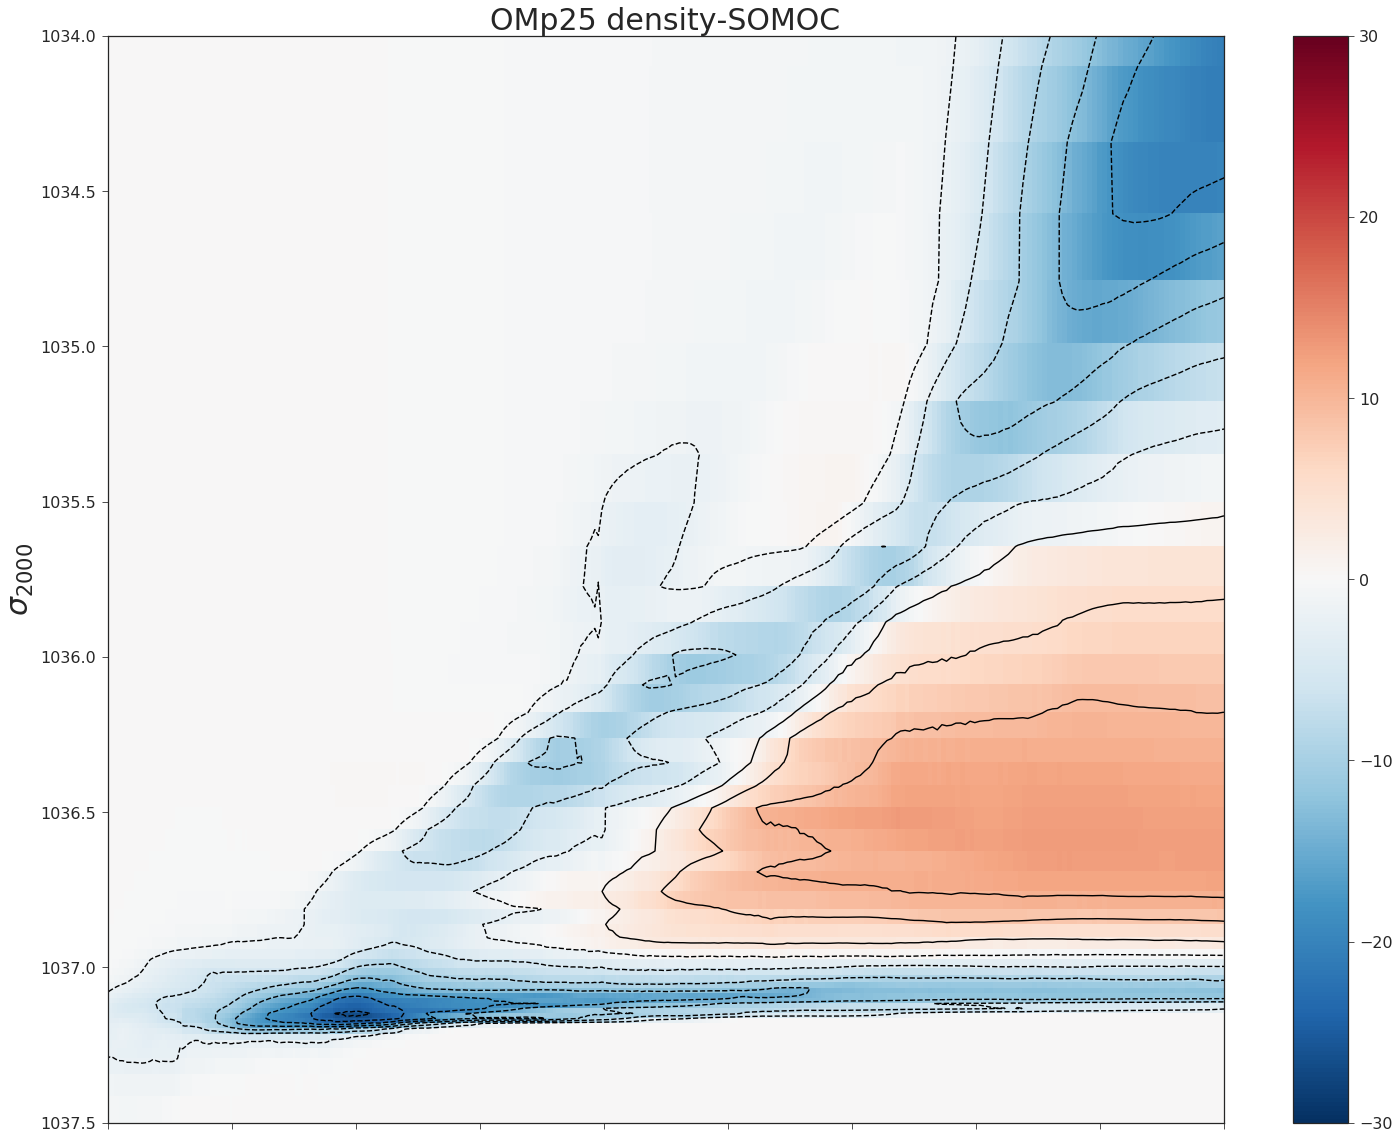

In [34]:
plt.figure(figsize=(25,20)) 

field = psi_p25
xcoord = y_p25
ycoord = rho_p25
print(field.shape,' ',xcoord.shape,' ',ycoord.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)
#plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')
plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()
plt.ylabel("$\sigma_{2000}$",fontsize=30)
#plt.xlabel("latitude",fontsize=15)
plt.gca().set_facecolor('gray')
plt.title("OMp25 density-SOMOC",fontsize=30)
plt.gca().set_xticklabels([])


(64, 1080) (64, 1080) (64, 1080) (64, 1080)
(64, 576) (64, 576) (64, 576) (64, 576)
(64, 576) (64, 576) (64, 576) (64, 576)


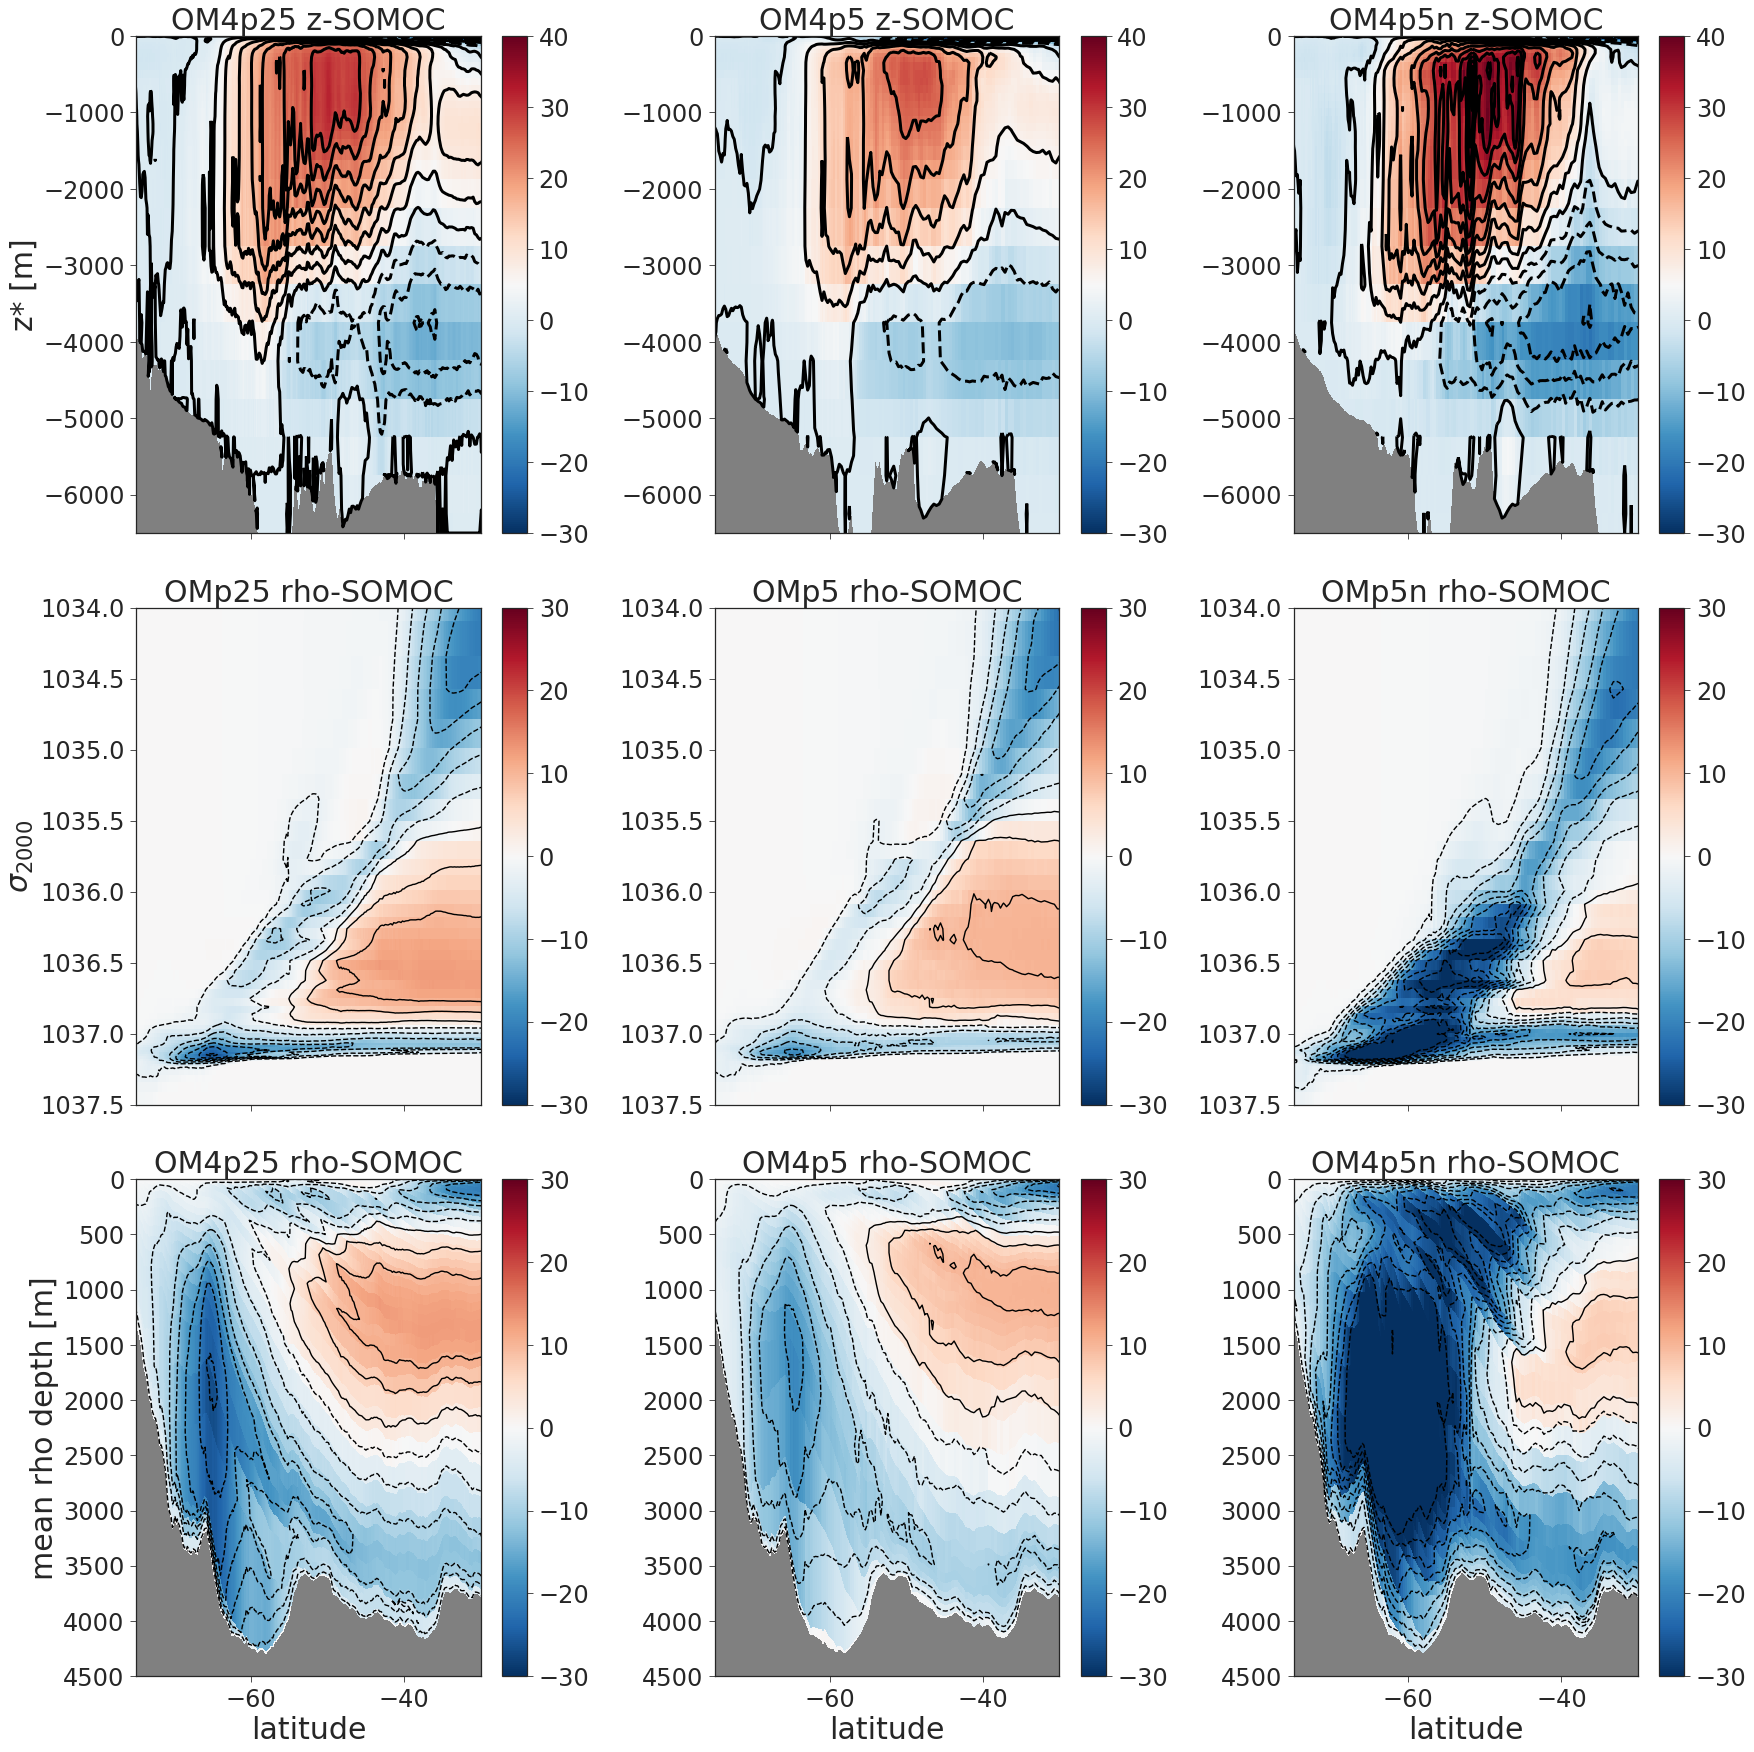

In [70]:
# now do the full lot 

plt.figure(figsize=(25,25)) 

plt.subplot(3,3,1)
ni = P25grid.variables['geolat_c'].shape[1]
zi = zi_at_v_for_zcoords(P25zdata.variables['z_i'], P25grid.variables['deptho']).min(axis=-1).filled(0.)
y = P25grid.variables['geolat_c'][:,ni/4-1]
y = y + 0*zi;
psiz_p25 = psi_from_zavmo( meridional_transport(P25zdata, mask=P25reg_vmask), top_to_bottom=False )/1.035e9
plt.pcolormesh(y,zi,psiz_p25,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
cb = plt.colorbar();
#cb.set_label('Sv')
plt.contour(y, zi, psiz_p25, 30, colors='k', linewidths=3);
plt.gca().set_facecolor('gray')
plt.xlim((-75,-30))
#plt.xlabel('Latitude $^\circ$N')
plt.ylabel('z* [m]',fontsize=30)
plt.title('OM4p25 z-SOMOC',fontsize=30)
plt.gca().set_xticklabels('')

#field = psiz_p25
#xcoordmesh,ycoordmesh = np.meshgrid(y_p25,z_i)
#plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
#plt.colorbar()
#xcoordmesh,ycoordmesh = np.meshgrid(y_p25,z_l)
#plt.contour(xcoordmesh,ycoordmesh,field,30,colors='k',linewidths=2)
#plt.xlim((-75,-30))
#plt.ylim((0,6000))
#plt.gca().invert_yaxis()
#plt.gca().set_facecolor('gray')
#plt.gca().set_ylabel("Depth [m]",fontsize=30)
#plt.gca().set_title("OM4p25 Z-SOMOC",fontsize=30)
#plt.gca().set_xticklabels([])



plt.subplot(3,3,2)

ni = P5grid.variables['geolat_c'].shape[1]
zi = zi_at_v_for_zcoords(P5zdata.variables['z_i'], P5grid.variables['deptho']).min(axis=-1).filled(0.)
y = P5grid.variables['geolat_c'][:,ni/4-1]
y = y + 0*zi;
psiz_p5 = psi_from_zavmo( meridional_transport(P5zdata, mask=P5reg_vmask), top_to_bottom=False )/1.035e9
plt.pcolormesh(y,zi,psiz_p5,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
cb = plt.colorbar();
#cb.set_label('Sv')
plt.contour(y, zi, psiz_p5, 30, colors='k', linewidths=3);
plt.gca().set_facecolor('gray')
plt.xlim((-75,-30))
#plt.xlabel('Latitude $^\circ$N')
#plt.ylabel('z* (m)',fontsize=30)
plt.title('OM4p5 z-SOMOC',fontsize=30)
plt.gca().set_xticklabels('')

#field = psiz_p5
#xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_i)
#plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
#plt.colorbar()
#xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_l)
#plt.contour(xcoordmesh,ycoordmesh,field,30,colors='k',linewidths=2)
#plt.xlim((-75,-30))
#plt.ylim((0,6000))
#plt.gca().invert_yaxis()
#plt.gca().set_facecolor('gray')
#plt.gca().set_ylabel("Depth [m]",fontsize=15)
#plt.gca().set_xlabel("latitude",fontsize=15)
#plt.gca().set_title("OM4p5 Z-SOMOC",fontsize=30)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])


plt.subplot(3,3,3)
ni = P5grid.variables['geolat_c'].shape[1]
zi = zi_at_v_for_zcoords(P5zdata.variables['z_i'], P5grid.variables['deptho']).min(axis=-1).filled(0.)
y = P5grid.variables['geolat_c'][:,ni/4-1]
y = y + 0*zi;
psiz_p5n = psi_from_zavmo( meridional_transport(P5Nzdata, mask=P5reg_vmask), top_to_bottom=False )/1.035e9
plt.pcolormesh(y,zi,psiz_p5n,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
cb = plt.colorbar();
#cb.set_label('Sv',fontsize=30)
plt.contour(y, zi, psiz_p5n, 30, colors='k', linewidths=3);
plt.gca().set_facecolor('gray')
plt.xlim((-75,-30))
#plt.xlabel('Latitude $^\circ$N')
#plt.ylabel('z* (m)',fontsize=30)
plt.title('OM4p5n z-SOMOC',fontsize=30)
plt.gca().set_xticklabels('')

#field = psiz_p5n
#xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_i)
#plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=40)
#plt.colorbar()
#xcoordmesh,ycoordmesh = np.meshgrid(y_p5,z_l)
#plt.contour(xcoordmesh,ycoordmesh,field,30,colors='k',linewidths=2)
#plt.xlim((-75,-30))
#plt.ylim((0,6000))
#plt.gca().invert_yaxis()
#plt.gca().set_facecolor('gray')
#plt.gca().set_ylabel("Depth [m]",fontsize=15)
#plt.gca().set_xlabel("latitude",fontsize=15)
#plt.gca().set_title("OM4p5n Z-SOMOC",fontsize=30)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])


plt.subplot(3,3,4)
field = psi_p25
xcoord = y_p25
ycoord = rho_p25
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
#plt.pcolormesh(xcoordmesh,ycoordmesh,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')
plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()
plt.ylabel("$\sigma_{2000}$",fontsize=30)
#plt.xlabel("latitude",fontsize=15)
plt.gca().set_facecolor('gray')
plt.title("OMp25 rho-SOMOC",fontsize=30)
plt.gca().set_xticklabels([])


plt.subplot(3,3,5)
field = psi_p5
xcoord = y_p5
ycoord = rho_p5
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')
plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()
#plt.ylabel("$\sigma_{2000}$",fontsize=30)
#plt.xlabel("latitude",fontsize=15)
plt.gca().set_facecolor('gray')
plt.title("OMp5 rho-SOMOC",fontsize=30)
plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])



plt.subplot(3,3,6)
field = psi_p5n
xcoord = y_p5
ycoord = rho_p5
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')
plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()
#plt.ylabel("$\sigma_{2000}$",fontsize=30)
#plt.xlabel("latitude",fontsize=15)
plt.gca().set_facecolor('gray')
plt.title("OMp5n rho-SOMOC",fontsize=30)
plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])


plt.subplot(3,3,7)
field = psi_p25
ycoord = zrho_p25
zarray = np.ones(ycoord.shape)
xcoord = y_p25 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')
field = sigma_p25-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p25,zl_p25)
#plt.contour(xcoordmesh,ycoordmesh,field,20,colors='g',vmin=33,vmax=40,linewidths=2)
plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()
plt.ylabel("mean rho depth [m]",fontsize=30)
plt.xlabel("latitude",fontsize=30)
plt.gca().set_facecolor('gray')
plt.title("OM4p25 rho-SOMOC",fontsize=30)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])



plt.subplot(3,3,8)
field = psi_p5
ycoord = zrho_p5
zarray = np.ones(ycoord.shape)
xcoord = y_p5 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')
field = sigma_p5-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,zl_p5)
#plt.contour(xcoordmesh,ycoordmesh,field,20,colors='g',vmin=33,vmax=40,linewidths=2)
plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()
#plt.ylabel("Depth [m]",fontsize=30)
plt.xlabel("latitude",fontsize=30)
plt.gca().set_facecolor('gray')
plt.title("OM4p5 rho-SOMOC",fontsize=30)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])



plt.subplot(3,3,9)
field = psi_p5n
ycoord = zrho_p5n
zarray = np.ones(ycoord.shape)
xcoord = y_p5 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')
field = sigma_p5n-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p5,zl_p5)
#plt.contour(xcoordmesh,ycoordmesh,field,20,colors='g',vmin=33,vmax=40,linewidths=2)
plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()
#plt.ylabel("Depth [m]",fontsize=30)
plt.xlabel("latitude",fontsize=30)
plt.gca().set_facecolor('gray')
plt.title("OM4p5n rho-SOMOC",fontsize=30)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])


plt.tight_layout()
plt.savefig('./figures/somoc_OM4.png', bbox_inches='tight', dpi=100)
plt.show()


In [63]:
# Now show why there are problems with vo-based streamfunctions 

In [64]:
field = vo_p25 * thk_p25 * dx_p25 * rho0
#field = thk_p25 * dx_p25 * rho0
fieldA = np.sum(field,axis=2)
psi_p25_mn = (np.cumsum(fieldA,axis=0) - np.sum(fieldA,axis=0))/1e9 + 0.1 
#psi_p25_mn = (np.cumsum(fieldA,axis=0) )/1e9 + 0.1 
print(np.sum(fieldA,axis=0)/1e9)

print(thk_p25.shape,dx_p25.shape,vo_p25.shape,field.shape, psi_p25_mn.shape,np.ma.is_masked(thk_p25))

/nbhome/smg/anaconda3/envs/research/lib/python3.6/site-packages/numpy/ma/core.py:1017: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


[-- -- -- ... -0.17904824018478394 -0.18498946726322174 0.548511803150177]
(64, 1080, 1440) (1080, 1440) (64, 1080, 1440) (64, 1080, 1440) (64, 1080) True


(1080,) (64,) (64, 1080)


<Figure size 720x360 with 0 Axes>

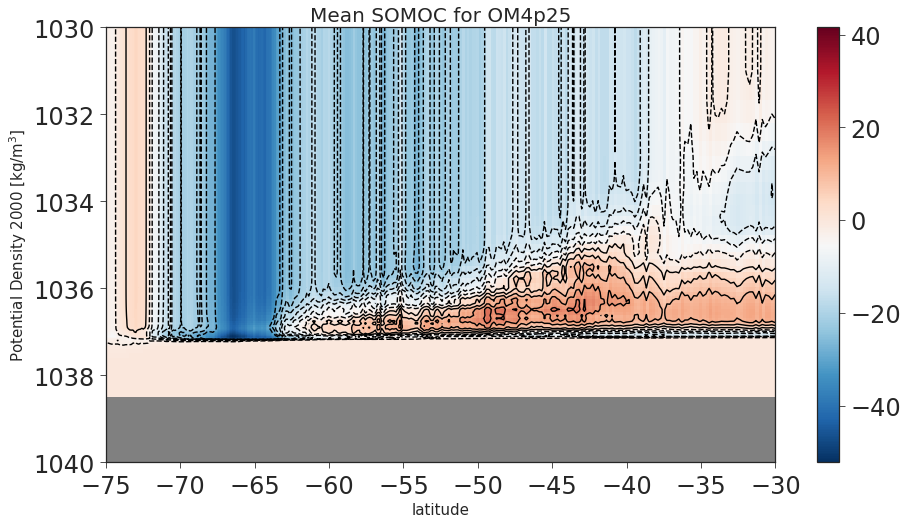

In [65]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p25_mn
xcoord = y_p25
ycoord = rho_p25
print(xcoord.shape,ycoord.shape,field.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)

#plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r')
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')

plt.xlim((-75,-30))
plt.ylim((1030,1040))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Mean SOMOC for OM4p25",fontsize=20)

plt.show()

fig.savefig('./figures/mean_somoc_OM4p25.png', bbox_inches='tight', dpi=300)